In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d zzettrkalpakbal/full-filled-brain-stroke-dataset

full-filled-brain-stroke-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  full-filled-brain-stroke-dataset.zip
replace full_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stroke_data=pd.read_csv('full_data.csv')

In [ ]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# **Data Cleaning**

In [ ]:
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Creating dummy variables for numeric-binary attributes

# **Visualizing categorical columns**

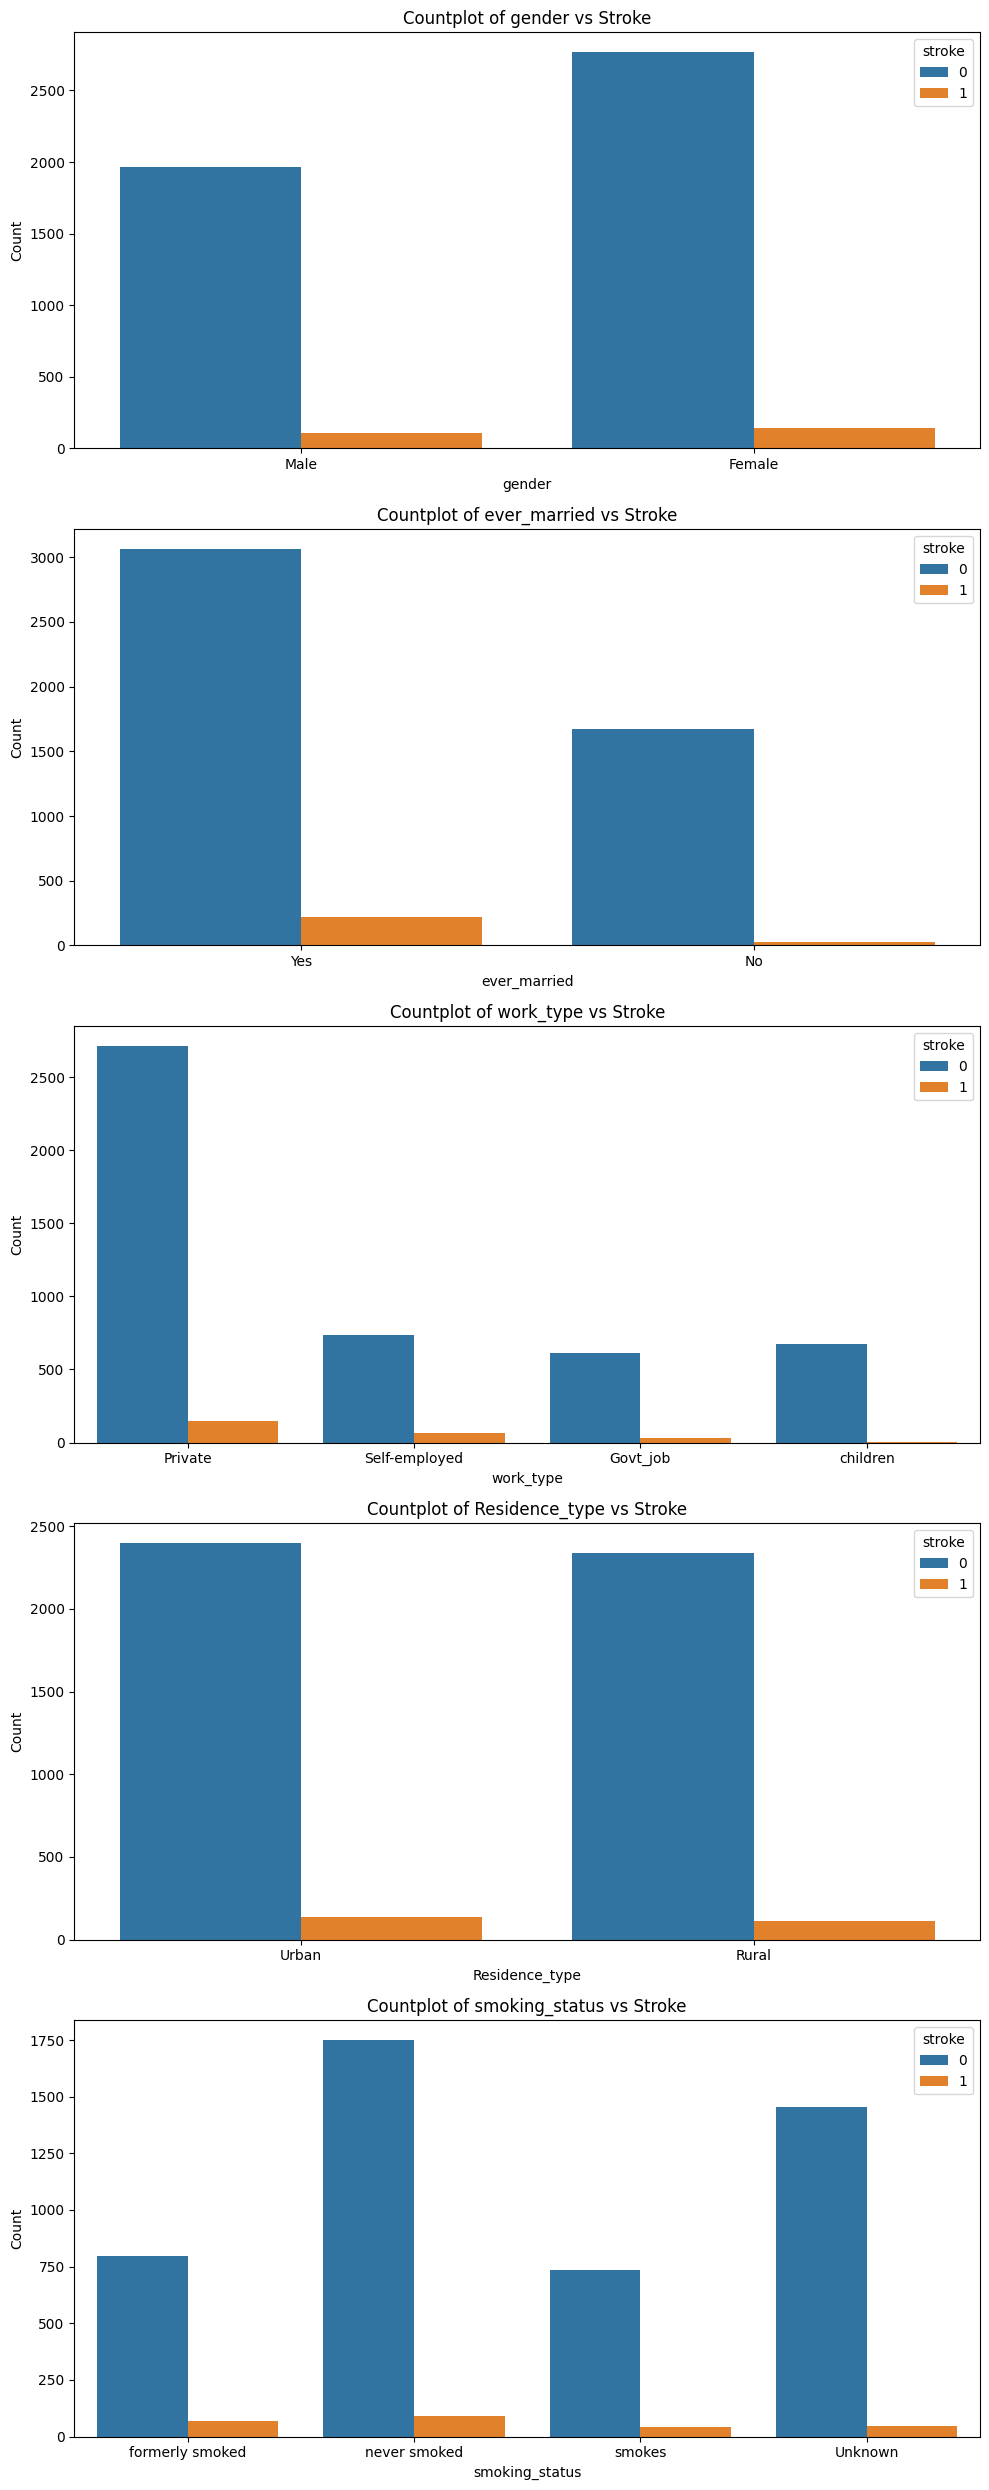

In [ ]:
# Categorical columns to visualize
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Plot count plots for each categorical column
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, hue='stroke', data=stroke_data, ax=ax)
    ax.set_title(f'Countplot of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

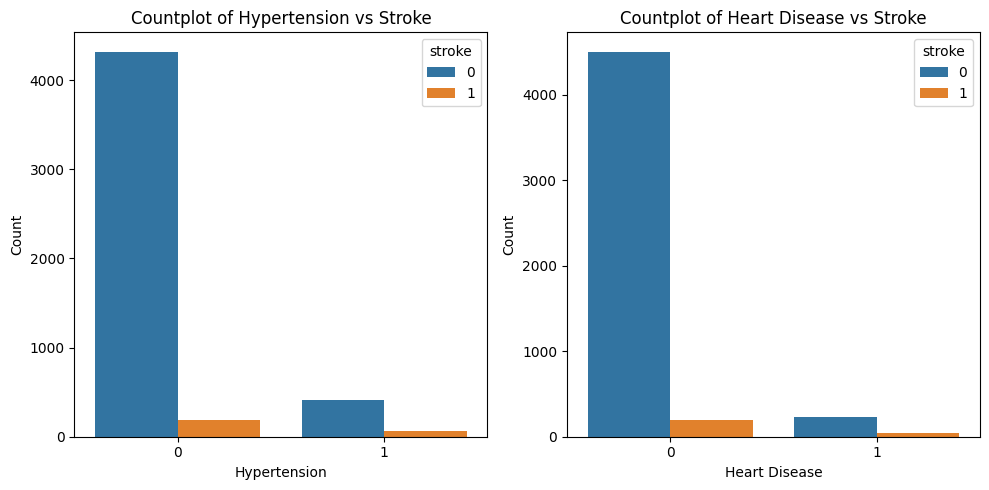

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x='hypertension', hue='stroke', data=stroke_data, ax=axes[0])
axes[0].set_title('Countplot of Hypertension vs Stroke')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

sns.countplot(x='heart_disease', hue='stroke', data=stroke_data, ax=axes[1])
axes[1].set_title('Countplot of Heart Disease vs Stroke')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
stroke_data['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

<Axes: >

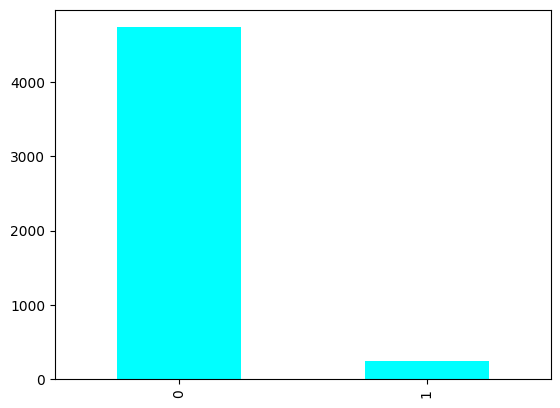

In [ ]:
# Graphical representation of the value count distribution of the target attribute
stroke_data['stroke'].value_counts().plot(kind="bar",color = "cyan")

<Axes: >

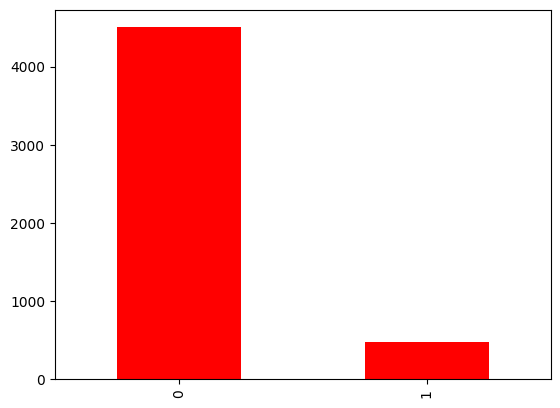

In [ ]:
# Graphical representation of the value counts of the hypertension attribute
stroke_data['hypertension'].value_counts().plot(kind="bar",color = "red")

In [ ]:
# Value of count of work-type attribute
stroke_data['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

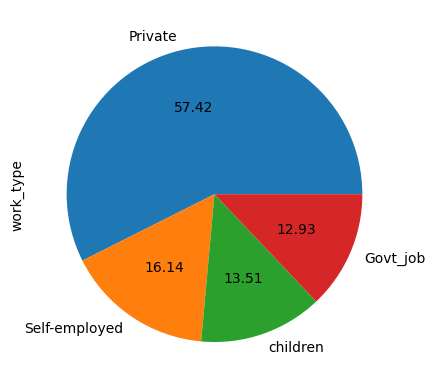

In [ ]:
# Graphical representation of the value counts of the work-type attribute
stroke_data['work_type'].value_counts().plot(kind="pie",autopct='%.2f')

In [ ]:
# Value of count of somoking status attribute
stroke_data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

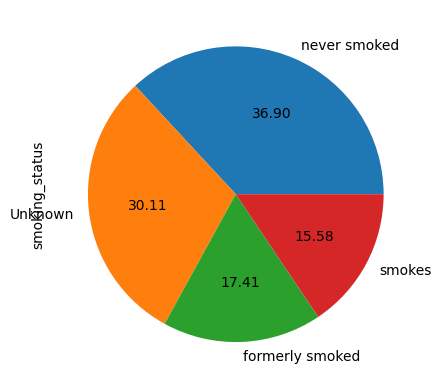

In [ ]:
# Graphical representation of the value counts of the smoking staus attribute
stroke_data['smoking_status'].value_counts().plot(kind="pie",autopct='%.2f')

<Axes: xlabel='gender', ylabel='avg_glucose_level'>

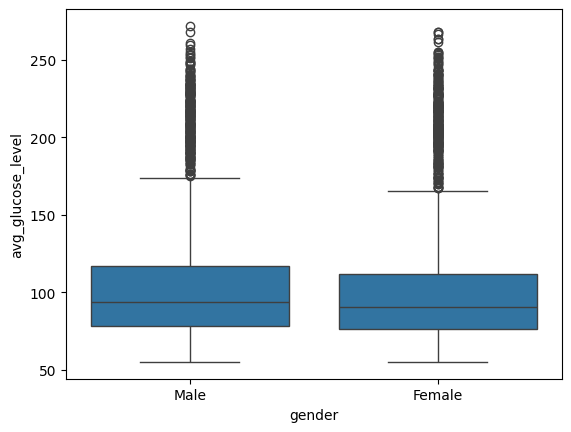

In [ ]:
sns.boxplot(data = stroke_data,x='gender',y= 'avg_glucose_level')

<Axes: xlabel='stroke', ylabel='age'>

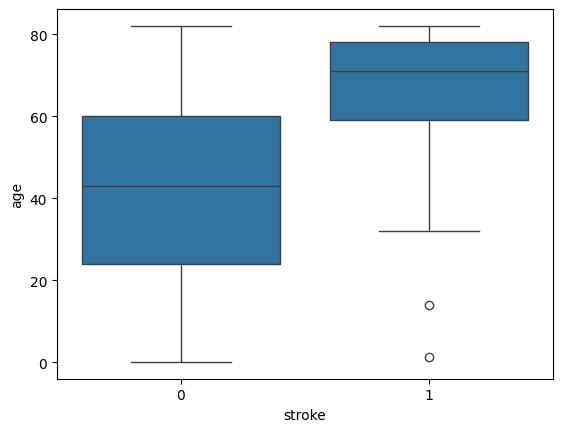

In [ ]:
sns.boxplot(data = stroke_data,x='stroke',y='age')

# **Data Standardization**

In [ ]:
# Converting numeric-binary value attributes to string
stroke_data[['hypertension', 'heart_disease', 'stroke']] = stroke_data[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
stroke_data = pd.get_dummies(stroke_data, drop_first= True)

In [ ]:
stroke_data.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,1,0,0,1,1,0,0,1
1,80.0,105.92,32.5,1,0,1,1,1,0,0,0,0,1,0,1
2,49.0,171.23,34.4,0,0,0,1,1,0,0,1,0,0,1,1
3,79.0,174.12,24.0,0,1,0,1,0,1,0,0,0,1,0,1
4,81.0,186.21,29.0,1,0,0,1,1,0,0,1,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
stroke_data[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(stroke_data[['bmi', 'avg_glucose_level', 'age']])

In [ ]:
X=stroke_data.iloc[:,:-1].values
y=stroke_data.iloc[:,-1].values

In [ ]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3984, 14)
y_train: (3984,)
X_test: (997, 14)
y_test: (997,)


# **Splitting data into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

# **Model Building**

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Accuracy Checking

In [ ]:
y_pred_lr = classifier.predict(X_test)
confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9458375125376128


# KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9358074222668004


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 0.9147442326980942
Confusion matrix: [[901  42]
 [ 43  11]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9428284854563691
